# 1. 복습하기

* 머신러닝이란?  

* 지도학습이란?

* 비지도학습이란?

* 분류 문제는?

* 회귀 문제는?


# 2. 문제정의

* 전문 식물학자가 setosa, versicolor, virginica 종으로 분류한 붓꽃의 꽃잎(petal) 길이와 꽃받침(sepal) 길이를 측정한 데이터도 가지고 있다.

* 우리의 목표는 어떤 품종인지 구분해놓은 측정 데이터를 이용해 새로 채집한 붓꽃의 품종을 예측하는 머신러닝 모델을 만드는 것이다.

* 붓꽃의 품종을 정확하게 분류한 데이터를 가지고 있으므로 이 문제는 ( 지도 학습 )에 속한다. 이 경우에는 몇 가지 선택사항(붓꽃의 품종) 중 하나를 선택하는 문제이므로 이 예는 ( 분류 ) 문제에 해당한다.

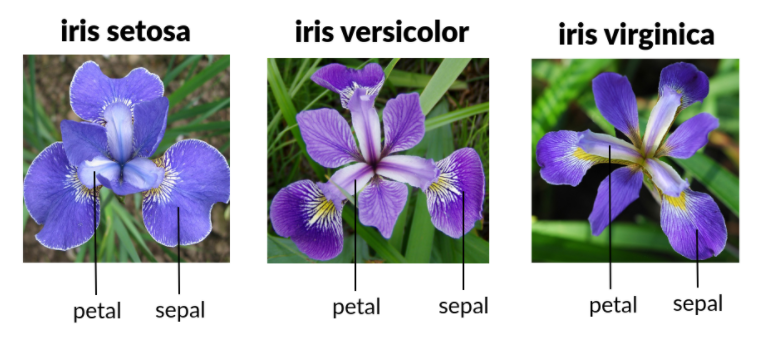

# 3. 데이터 수집

In [1]:
# 사이킷런 로딩
from sklearn.datasets import load_iris

In [2]:
# iris 데이터 세트 로딩 (사이킷런 내장 예제 데이터)
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
# 데이터 세트 키
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

* data는 피처의 데이터 세트를 가리킨다.
* target은 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트이다.
* target_names는 개별 레이블의 이름을 나타낸다.
* DESCR은 데이터 세트에 대한 설명과 각 피처의 설명을 나타낸다.
* feature_names는 피처의 이름을 나타낸다.

In [4]:
# 데이터 세트 설명 출력
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# iris.data : iris 데이터 세트에서 피처(Feature)만으로 된 numpy 2차원 배열 (150, 4)
# iris.target : iris 데이터 세트에서 정답(Label 데이터)을 갖고 있는 numpy 1차원 배열 (150, ) 
print(iris.data[:10]) # ndarray
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


# 4. 데이터 분석 및 시각화

In [6]:
# 판다스 로딩
import pandas as pd
# iris 데이터 세트를 DataFrame으로 변환하기
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [7]:
# 앞 5개 데이터 보기
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [8]:
# 뒤 5개 데이터 보기
df.tail()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
145       2  
146       2  
147       2  
148       2  
149       2

In [9]:
# 데이터프레임 열 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


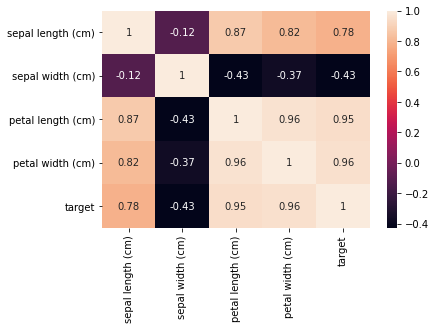

In [10]:
# Heatmap으로 상관관계 확인하기
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(), annot=True)
plt.show()

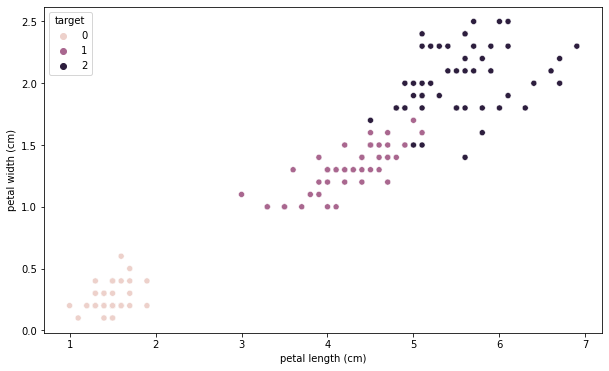

In [11]:
# 꽃잎의 길이와 너비에 따른 레이블 분포
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df['target'])
plt.show()

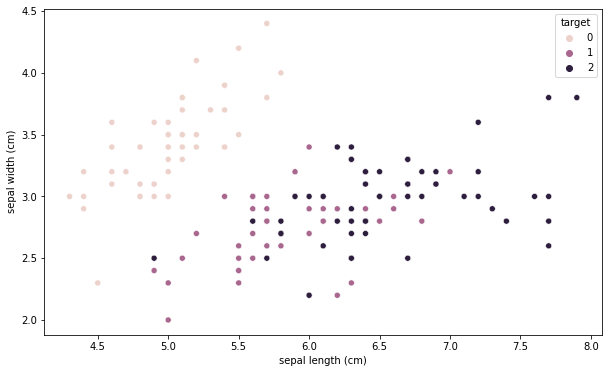

In [12]:
# 꽃받침의 길이와 너비에 따른 레이블 분포
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['target'])
plt.show()

# 5. 데이터 분리

* 전체 데이터를 훈련을 위한 ( 훈련(학습) 데이터셋(Training Dataset) )와 테스트를 위한 ( 테스트(평가) 데이터셋(Test Dataset) )로 분리한다.

* 훈련 데이터로 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하려면 테스트 데이터 세트가 필요하다.

In [13]:
# 학습 데이터 세트 : 80%, 테스트 데이터 세트 : 20%로 분리 (디폴트 : 0.25)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state = 11)

X_train.shape, X_test.shape

((120, 4), (30, 4))

In [14]:
# 훈련 데이터, 테스트 데이터 확인
print(y_train)
print(y_test)

[0 2 2 0 0 2 2 1 0 1 1 2 0 1 2 1 1 0 2 0 2 2 1 2 1 0 0 1 0 0 2 2 2 0 0 0 1
 0 1 2 2 1 1 2 2 0 1 1 2 2 2 0 2 0 0 0 0 2 0 0 0 1 0 1 1 2 1 0 0 0 1 1 1 2
 1 0 1 2 0 2 2 1 0 0 0 2 1 0 2 1 2 0 0 1 1 2 1 2 2 1 1 2 2 0 1 2 0 2 2 0 1
 2 0 1 1 1 0 1 1 1]
[2 2 2 1 2 0 1 0 0 1 2 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]


# 6. 머신러닝 알고리즘 선택

* ( 결정 트리(Decision Trees) ) : 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내어 트리 기반의 분류 규칙을 만드는 알고리즘  
[사이킷런 페이지](https://scikit-learn.org/stable/modules/tree.html)

* ( 결정 트리 ) 알고리즘은 스무고개와 비슷하여 데이터의 특징을 바탕으로 데이터를 연속적으로 분리하다보면 결국 하나의 정답으로 데이터를 분류할 수 있다.

* 스무고개 놀이에서 적은 질문으로 정답을 맞추기 위해서는 의미있는 질문을 **먼저** 하는 것이 중요하듯이, 결정 트리에서도 의미있는 질문을 **먼저** 하는 것이 상당히 중요함, 즉, 가장 분류에 큰 영향을 끼치는 특징을 발견하여 상위 노드로 선택하는 알고리즘이 결정 트리 알고리즘의 핵심이다. 

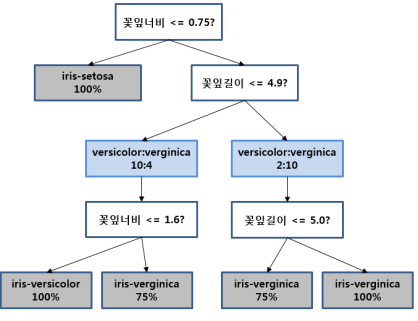

* 결정 트리의 장점 : 다른 알고리즘에 비해 결과값이 어떻게 나왔는지 이해하기 쉬움, 데이터에서 중요한 특성이 무엇인지 알기 쉬움

* 결정 트리의 단점 : ( 과대적합 )되기 쉬움

[참고] 과소적합(Underfitting) vs 과대적합(Overfitting)

* ( 과소적합 ) : 데이터에서 충분한 특징을 찾아내지 못하고 머신러닝 모델을 학습할 경우 모델이 ( 과소적합 )되기 쉬움, 테스트 데이터 뿐만 아니라 학습 데이터에 대해서도 정확도가 낮게 나올 경우 ( 과소적합 )된 모델일 가능성이 높음

* ( 과대적합 ) : 필요 이상의 특징으로 학습할 경우 모델이 ( 과대적합 ) 되기 쉬움, 학습 데이터에 대한 정확도는 상당히 높지만 테스트 데이터에는 정확도가 낮게 나오는 모델을 ( 과대적합 )된 모델이라 부름

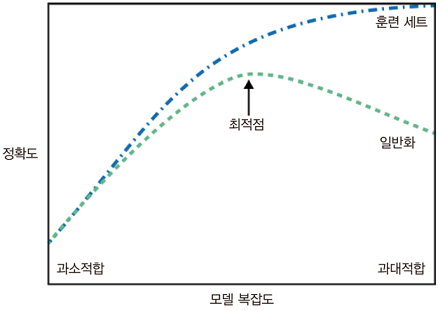

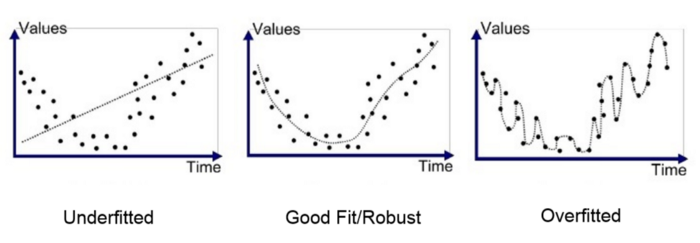

In [15]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier 객체 생성
dt = DecisionTreeClassifier(random_state=11)

# 7. 훈련 데이터 세트로 학습(Training)하기

In [16]:
# 모델 학습하기
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

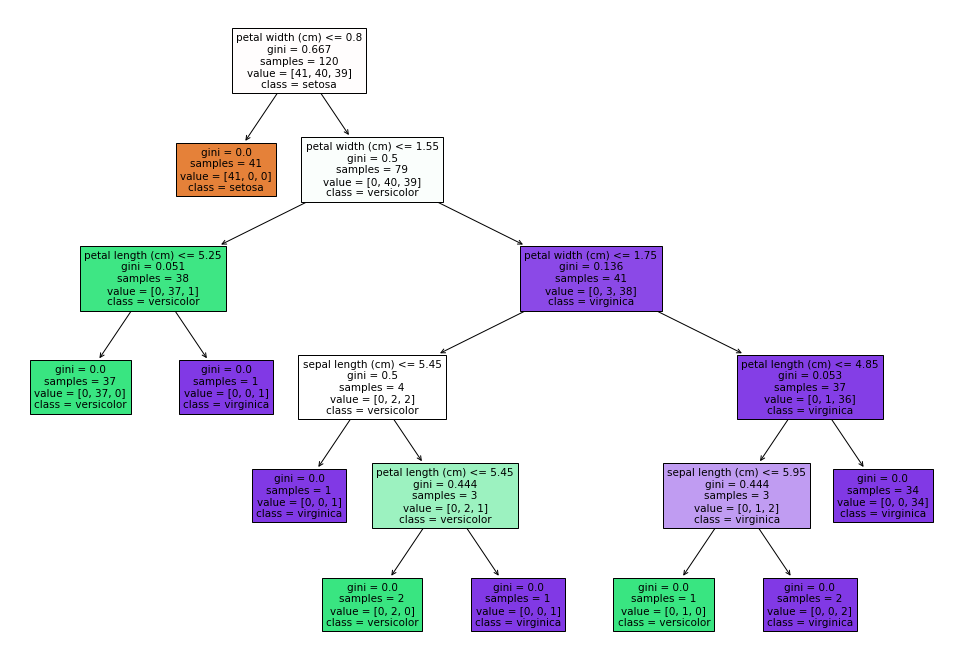

In [25]:
# 결정 트리 그리기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(17, 12))
plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

* gini : 지니 불순도, 노드에서 데이터를 분할하는 기준

* 계산방법 : 1 - (클래스1비율^2 + 클래스2비율^2 + 클래스3비율^2)

* 부모 노드와 자식 노드의 gini 불순도 차이가 가능한 크도록 트리를 성장시킴

In [30]:
1 - ((41/120)**2 + (40/120)**2 + (39/120)**2)

0.6665277777777778

In [31]:
# 특성 중요도 확인하기
dt.feature_importances_

array([0.02500521, 0.        , 0.04867657, 0.92631822])

# 8. 테스트 데이터 세트로 예측(Predict)하기

In [32]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt.predict(X_test)
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [33]:
# 비교를 위해 테스트 데이터 정답(레이블) 출력하기
y_test

array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [34]:
28/30

0.9333333333333333

In [35]:
# 새로운 데이터를 넣어서 품종 예측하기
my_data = [[5, 3, 1, 0.5]]
dt.predict(my_data)

array([0])

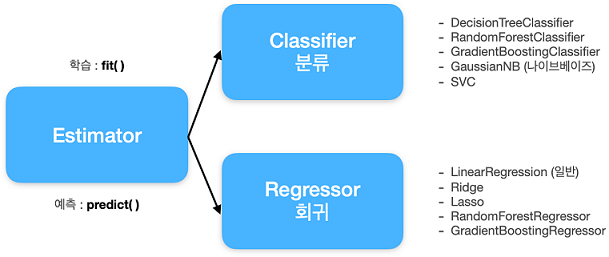

# 9. 정확도 평가

* 정확도(Accuracy) : 예측 결과가 실제 값과 얼마나 정확하게 맞는지를 평가하는 지표

Q. 100개의 데이터가 있고 50개의 데이터 레이블이 0, 나머지 50개의 데이터 레이블이 1일 때 무조건 0으로 예측할 경우 정확도는? ( 50% )

Q. 100개의 데이터가 있고 95개의 데이터 레이블이 0, 나머지 5개의 데이터 레이블이 1일 때 무조건 0으로 예측할 경우 정확도는? ( 95% )

* 정확도 평가 지표는 불균형한 데이터 세트에서는 평가 지표로 사용되어서는 안된다.

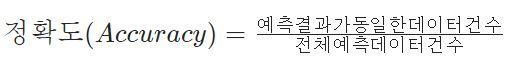

In [36]:
# 정확도 보기
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.9333333333333333

In [37]:
dt.score(X_train, y_train)

1.0

In [38]:
dt.score(X_test, y_test)

0.9333333333333333